In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#lets now create a function to apply all of our data preprocessing steps which we can then use as a corpus

def preprocess_text(new_reviews):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(new_reviews) #tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stopwords] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #stemming
  return stemmed_text

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [5]:
#Now lets read in our review data, we are going to use for this analysis

reviews = pd.read_csv('tourist_accommodation_reviews.csv', encoding = 'Windows-1252', skipinitialspace=True)
reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [6]:
reviews.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [8]:
reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [9]:
reviews.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [10]:
#Itrerating through the dataset and picking 30 hotels based on location

Location_to_select_from = ['Cape Panwa','Karon Beach','Chalong']
#'Karon Beach',
 
review_for_30_hotels = reviews[reviews.Location.isin(Location_to_select_from)]



In [11]:
review_for_30_hotels.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,This place prides it’s self on only serving th...
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 Thai Bhat for a simply delicious mojito! I ...
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,Very trendy place to have your a meal Staff we...
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"Best food, starter start with bruschetta and f..."


In [12]:
review_for_30_hotels.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
51979,rn546658460,"Reviewed December 11, 2017",Chalong,La Boucherie - Chalong,The best steak house in Thailand. Very friendl...
51980,rn540151291,"Reviewed November 11, 2017",Chalong,La Boucherie - Chalong,We had a great lunch there. We ate the burger ...
51981,rn503150397,"Reviewed July 18, 2017",Chalong,La Boucherie - Chalong,"The food was very disappointing, tasteless and..."
51982,rn501506367,"Reviewed July 13, 2017",Chalong,La Boucherie - Chalong,I'm so happy to visit these restaurant! Kindly...
51983,rn496441879,"Reviewed June 27, 2017",Chalong,La Boucherie - Chalong,"Its almost original wine service, good and fri..."


In [13]:
review_for_30_hotels.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3184,3184,3184,3184,3184
unique,3064,1212,3,32,3064
top,rn556021496,Reviewed 2 weeks ago,Cape Panwa,EAT. bar & grill,"The place is, may be, nice for eating fine ita..."
freq,5,28,1500,100,5


In [14]:
new_reviews = review_for_30_hotels

In [15]:
review_for_30_hotels['Hotel/Restaurant name'].nunique()

32

In [16]:
#we can extract the values from the dictionary and create new columns within our dataframe 

new_reviews['compound'] = [sentiment.polarity_scores(new_reviews)['compound'] for new_reviews in new_reviews['Review']]
new_reviews['neg'] = [sentiment.polarity_scores(new_reviews)['neg'] for new_reviews in new_reviews['Review']]
new_reviews['neu'] = [sentiment.polarity_scores(new_reviews)['neu'] for new_reviews in new_reviews['Review']]
new_reviews['pos'] = [sentiment.polarity_scores(new_reviews)['pos'] for new_reviews in new_reviews['Review']]

C:\Users\LAWAL\AppData\Local\Temp/ipykernel_22584/310330693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reviews['compound'] = [sentiment.polarity_scores(new_reviews)['compound'] for new_reviews in new_reviews['Review']]
C:\Users\LAWAL\AppData\Local\Temp/ipykernel_22584/310330693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reviews['neg'] = [sentiment.polarity_scores(new_reviews)['neg'] for new_reviews in new_reviews['Review']]
C:\Users\LAWAL\AppData\Local\Temp/ipykernel_22584/31033069

In [17]:
new_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...,0.4939,0.080,0.759,0.161
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,This place prides it’s self on only serving th...,0.8402,0.027,0.811,0.162
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 Thai Bhat for a simply delicious mojito! I ...,0.6467,0.000,0.791,0.209
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,Very trendy place to have your a meal Staff we...,0.5413,0.000,0.837,0.163
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"Best food, starter start with bruschetta and f...",0.8779,0.000,0.581,0.419


In [18]:
new_reviews.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
51979,rn546658460,"Reviewed December 11, 2017",Chalong,La Boucherie - Chalong,The best steak house in Thailand. Very friendl...,0.9575,0.000,0.408,0.592
51980,rn540151291,"Reviewed November 11, 2017",Chalong,La Boucherie - Chalong,We had a great lunch there. We ate the burger ...,0.9335,0.000,0.740,0.260
51981,rn503150397,"Reviewed July 18, 2017",Chalong,La Boucherie - Chalong,"The food was very disappointing, tasteless and...",-0.5100,0.162,0.779,0.059
51982,rn501506367,"Reviewed July 13, 2017",Chalong,La Boucherie - Chalong,I'm so happy to visit these restaurant! Kindly...,0.9718,0.000,0.313,0.687
51983,rn496441879,"Reviewed June 27, 2017",Chalong,La Boucherie - Chalong,"Its almost original wine service, good and fri...",0.7041,0.034,0.787,0.179


In [19]:
new_reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3184.000000,3184.000000,3184.000000,3184.000000
mean,0.677425,0.025922,0.735816,0.238269
std,0.408801,0.050356,0.127363,0.134821
min,-0.934500,0.000000,0.286000,0.000000
25%,0.624900,0.000000,0.652000,0.137000
50%,0.848100,0.000000,0.743000,0.231000
75%,0.926000,0.041000,0.828000,0.324000
max,0.990900,0.384000,1.000000,0.714000


<AxesSubplot:xlabel='compound', ylabel='Count'>

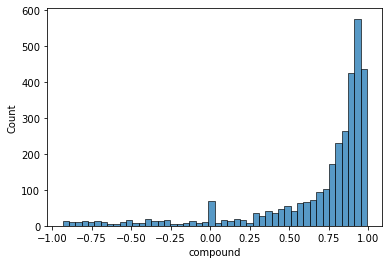

In [20]:
sns.histplot(new_reviews['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

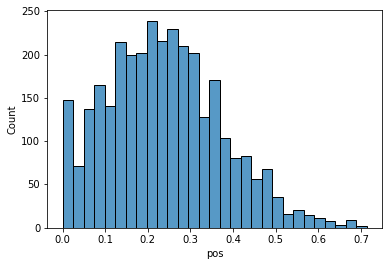

In [21]:
sns.histplot(new_reviews['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

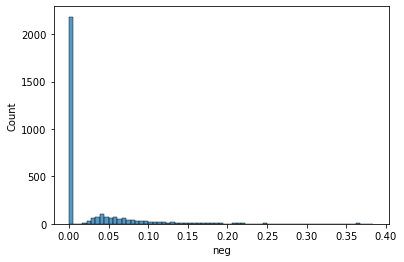

In [22]:
sns.histplot(new_reviews['neg'])

In [23]:
#lets look at how many negative reviews we have pre product 

(new_reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Baan Noy Restaurant                         4
Baan Ra Tree Restaurant                    12
Baba Soul Food                              4
Bamboo Bar                                  9
Curry Night Indian Restaurant               3
Dino Park                                  16
EAT. bar & grill                            4
Fatty's                                    10
Flavor Phuket                               6
Happy Days                                  9
Kan Eang 2                                 14
Kan Eang@Pier Restaurant                   13
Kusuma Seafood                             20
La Boucherie - Chalong                     11
Live India Indian Restaurant               10
MaMa Jin Restaurant                         6
Mali Chic Restaurant                       12
Mamma Mia Grill & Restaurant Bangtao        9
On The Rocks - Marina Phuket Resort         9
Panwa House                                 8
Pizzeria AGLI AMICI da Michele & Jimmy      7
Plum Prime S

In [24]:
new_reviews['Hotel/Restaurant name'].nunique()

32

In [25]:
# calculate as percentage of total reviews

percent_negative = pd.DataFrame((new_reviews['compound']<=0).groupby(new_reviews['Hotel/Restaurant name']).sum()
    /reviews['Hotel/Restaurant name'].groupby(new_reviews['Hotel/Restaurant name']).count()*100,
columns=['%negative new_reviews']).sort_values(by='%negative new_reviews')
percent_negative

,%negative new_reviews
Hotel/Restaurant name,
The Cove Phuket,2.000000
Curry Night Indian Restaurant,3.000000
Baan Noy Restaurant,4.000000
Baba Soul Food,4.000000
EAT. bar & grill,4.000000
The Grill,5.000000
Tree Top Restaurant and Bar,6.000000
Pure Vegan Heaven,6.000000
MaMa Jin Restaurant,6.000000


<AxesSubplot:xlabel='%negative new_reviews', ylabel='Hotel/Restaurant name'>

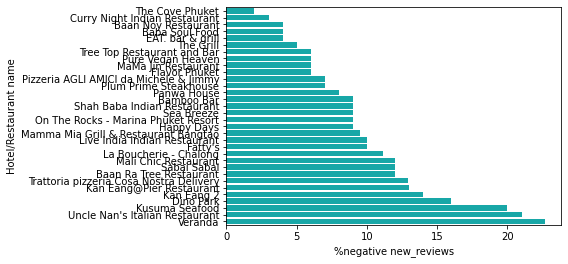

In [26]:
sns.barplot(data=percent_negative, x='%negative new_reviews', y=percent_negative.index, color='c')

In [27]:
#process the  text data ready for wordcloud visualization, using the function we defined earlier

# for this part of the exercise we will focus specifically on Veranda because it has more negative review

new_reviews['processed_new_reviews'] = new_reviews['Review'].apply(preprocess_text)
reviews_positive_subset = new_reviews.loc[(new_reviews['Hotel/Restaurant name']=="Veranda") & (new_reviews['compound']>0),:]
reviews_negative_subset = new_reviews.loc[(new_reviews['Hotel/Restaurant name']=="Veranda") & (new_reviews['compound']<=0),:]
                                                                                                   
reviews_positive_subset.head()

C:\Users\LAWAL\AppData\Local\Temp/ipykernel_22584/3372078879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reviews['processed_new_reviews'] = new_reviews['Review'].apply(preprocess_text)


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_new_reviews
27480,rn578571621,Reviewed 1 week ago,Karon Beach,Veranda,First night in Karon Beach we stumbled across ...,0.5023,0.000,0.908,0.092,"[first, night, karon, beach, stumbl, across, v..."
27481,rn572404208,"Reviewed April 10, 2018",Karon Beach,Veranda,Conveniently located between our hotel and mos...,0.8244,0.042,0.752,0.205,"[conveni, locat, hotel, bar, restaur, beach, t..."
27483,rn547611676,"Reviewed December 16, 2017",Karon Beach,Veranda,We went to the restaurant two times. The food ...,0.8718,0.000,0.809,0.191,"[went, restaur, two, time, food, clearli, reas..."
27485,rn539591515,"Reviewed November 8, 2017",Karon Beach,Veranda,"Just returned from our 9 day holiday, in that ...",0.8016,0.000,0.767,0.233,"[return, 9, day, holiday, time, visit, 3, time..."
27486,rn526508279,"Reviewed September 22, 2017",Karon Beach,Veranda,Visiting this plaice every year during the six...,0.9213,0.000,0.647,0.353,"[visit, plaic, everi, year, six, year, alway, ..."


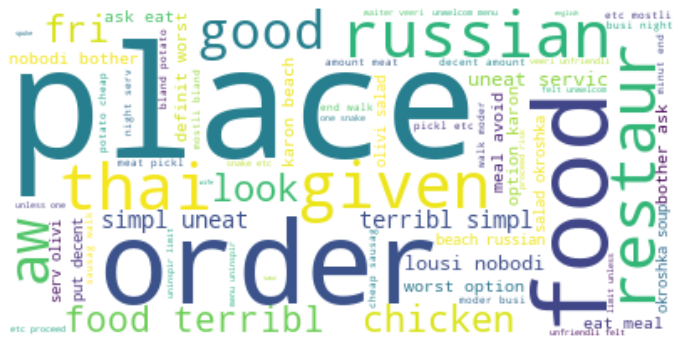

In [28]:
#wordcloud of words from the negative reviews by product

neg_tokens = [word for review in reviews_negative_subset['processed_new_reviews'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#display the generated image:

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()Ven

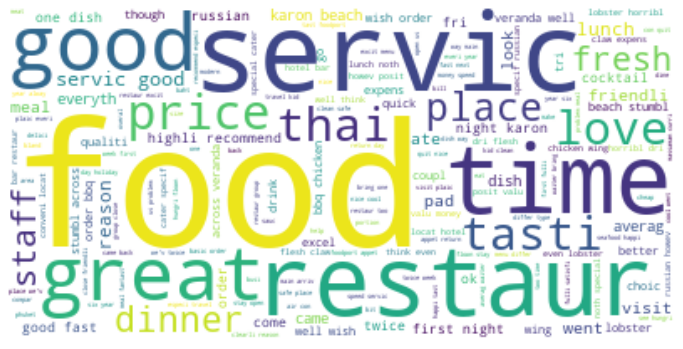

In [29]:
#wordcloud of words from the negative reviews by product

pos_tokens = [word for review in reviews_positive_subset['processed_new_reviews'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

#display the generated image:

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [30]:
# use the nltk FreqDist and the tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(15)


   food restaur  servic    good    time   place   order   great    dish    meal   price    love   twice russian   tasti 
     67      35      35      33      23      20      17      17      15      15      14      13      13      13      13 


In [31]:
# use the nltk FreqDist and the tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(15)


  place    food    walk russian    serv     etc    menu   order   minut  waiter  servic     ask    meal   worst   given 
     17      10      10       9       9       8       8       8       6       6       5       5       5       5       5 


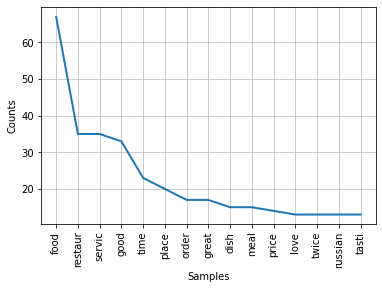

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
#Using frequency distribution plot to visualize

pos_freqdist.plot(15)

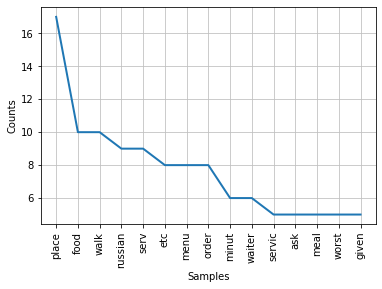

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
#Using frequency distribution plot to visualize

neg_freqdist.plot(15)